# Animal Classification using deep learning

In this animal classification project, we aim to develop a deep learning model capable of accurately identifying and distinguishing between five different animal classes: cat, dog, elephant, horse, and lion. The dataset provided for this task is divided into two subsets: training and validation. The training subset contains a large collection of images representing each animal class, which will be used to train our model to recognize the unique features and characteristics of each animal. The validation subset consists of images separate from the training set, enabling us to evaluate the performance of our trained model on unseen data and assess its generalization ability.

Animal classification is a fundamental problem in computer vision and has numerous practical applications, including wildlife monitoring, pet recognition, and animal behavior analysis. By accurately classifying animals from images, we can assist conservation efforts, enhance animal welfare, and support various research initiatives. Deep learning techniques, particularly convolutional neural networks (CNNs), have revolutionized image classification tasks and have shown remarkable performance in recognizing complex patterns and features in visual data.

## 1.Import Dependencies

We are going to import all the necessary modules,libraries etc which are essential for deep learning task.




In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
!pip install kaggle

In [3]:
from google.colab import files

uploaded = files.upload()


Saving kaggle.json to kaggle.json


In [4]:
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


In [5]:
!kaggle datasets download -d antobenedetti/animals

100% 881M/882M [00:44<00:00, 22.6MB/s]
100% 882M/882M [00:44<00:00, 20.6MB/s]


In [6]:
!unzip animals.zip -d animals

Streaming output truncated to the last 5000 lines.
  inflating: animals/animals/train/horse/horse2690.jpg  
  inflating: animals/animals/train/horse/horse2691.jpg  
  inflating: animals/animals/train/horse/horse2692.jpg  
  inflating: animals/animals/train/horse/horse2693.jpg  
  inflating: animals/animals/train/horse/horse2694.jpg  
  inflating: animals/animals/train/horse/horse2695.jpg  
  inflating: animals/animals/train/horse/horse2696.jpg  
  inflating: animals/animals/train/horse/horse2697.jpg  
  inflating: animals/animals/train/horse/horse2698.jpg  
  inflating: animals/animals/train/horse/horse2699.jpg  
  inflating: animals/animals/train/horse/horse27.jpg  
  inflating: animals/animals/train/horse/horse270.jpg  
  inflating: animals/animals/train/horse/horse2701.jpg  
  inflating: animals/animals/train/horse/horse2702.jpg  
  inflating: animals/animals/train/horse/horse2703.jpg  
  inflating: animals/animals/train/horse/horse2704.jpg  
  inflating: animals/animals/train/horse

## 2.Exploratory Data Analysis

Here we will  try to understand and visualize the image.

### Helper functions


In [7]:
import matplotlib.image as mpimg
import random
def view_random_images(path,class_name):
    dir = path+"/"+class_name
    for i in range(2):
        plt.subplot(1,2,i+1)
        random_image = random.choice(os.listdir(dir))
        print(random_image)
        image_path = dir +"/" + random_image
        image = mpimg.imread(image_path)
        plt.imshow(image)
        plt.title(f"Label : {class_name}")
        plt.axis("off")

In [8]:
import matplotlib.pyplot as plt

def plot_metric_curves(hist):
    """
    Plots the training and validation curves for loss, precision, and recall.

    Parameters:
        hist (History): A Keras History object containing training history.

    Returns:
        None
    """
    plt.figure(figsize=(10, 10))

    # Plot loss curves
    plt.subplot(2, 2, 1)
    plt.plot(hist.history["loss"], label="Training Loss")
    plt.plot(hist.history["val_loss"], label="Validation Loss")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.title("Loss Curve")
    plt.legend()

    # Plot precision curves
    plt.subplot(2, 2, 2)
    plt.plot(hist.history["precision"], label="Training Precision")
    plt.plot(hist.history["val_precision"], label="Validation Precision")
    plt.xlabel("Epoch")
    plt.ylabel("Precision")
    plt.title("Precision Curve")
    plt.legend()

    # Plot recall curves
    plt.subplot(2, 2, 3)
    plt.plot(hist.history["recall"], label="Training Recall")
    plt.plot(hist.history["val_recall"], label="Validation Recall")
    plt.xlabel("Epoch")
    plt.ylabel("Recall")
    plt.title("Recall Curve")
    plt.legend()

    # Adjust layout to prevent overlap
    plt.tight_layout()

    # Show plot
    plt.show()




In [9]:
from pathlib import Path
def count_images_in_classes(train_dir):
    """
    Count the number of images in each class folder within the training directory.

    Args:
    - train_dir: str or Path object representing the training directory path.

    Returns:
    - A dictionary where keys are class names and values are the number of images in each class folder.
    """

    # Convert train_dir to a Path object
    train_dir = Path(train_dir)

    # Get a list of class folders (NORMAL and PNEUMONIA)
    class_folders = [item for item in train_dir.iterdir() if item.is_dir()]

    # Initialize an empty dictionary to store the count of images in each class folder
    image_counts = {}

    # Iterate over each class folder and count the number of image files
    for folder in class_folders:
        class_name = folder.name
        image_count = sum(1 for item in folder.glob("*") if item.is_file() and item.suffix.lower() in ['.jpg', '.png', '.jpeg'])
        image_counts[class_name] = image_count

    return image_counts

In [10]:
import os
for dirpath,dirnames,filenames in os.walk("/content/animals/animals"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} files in {dirpath}")

There are 3 directories and 0 files in /content/animals/animals
There are 5 directories and 0 files in /content/animals/animals/val
There are 0 directories and 300 files in /content/animals/animals/val/dog
There are 0 directories and 300 files in /content/animals/animals/val/cat
There are 0 directories and 298 files in /content/animals/animals/val/lion
There are 0 directories and 300 files in /content/animals/animals/val/horse
There are 0 directories and 299 files in /content/animals/animals/val/elephant
There are 5 directories and 0 files in /content/animals/animals/train
There are 0 directories and 2627 files in /content/animals/animals/train/dog
There are 0 directories and 2737 files in /content/animals/animals/train/cat
There are 0 directories and 2675 files in /content/animals/animals/train/lion
There are 0 directories and 2705 files in /content/animals/animals/train/horse
There are 0 directories and 2730 files in /content/animals/animals/train/elephant
There are 0 directories and

In [11]:
import pathlib
dir = "/content/animals/animals/train"
path = pathlib.Path(dir)
class_names = np.sort([item.name for item in path.glob("*")])


In [12]:
class_names

array(['cat', 'dog', 'elephant', 'horse', 'lion'], dtype='<U8')

dog2147.jpg
dog2479.jpg


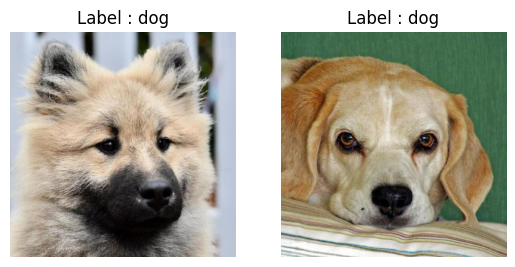

In [13]:
view_random_images("/content/animals/animals/train","dog")

cat276.jpg
cat2017.jpg


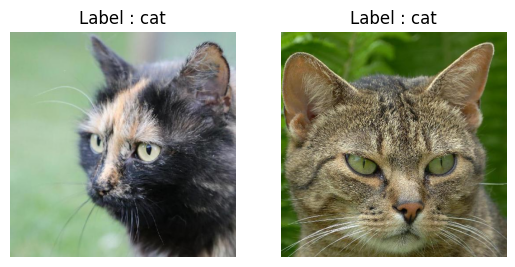

In [14]:
view_random_images("/content/animals/animals/train","cat")

elephant516.jpg
elephant1445.jpg


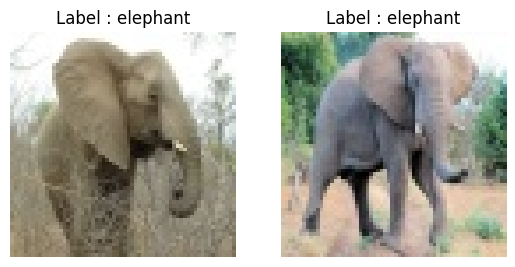

In [15]:
view_random_images("/content/animals/animals/train","elephant")

lion1532.jpg
lion77.jpg


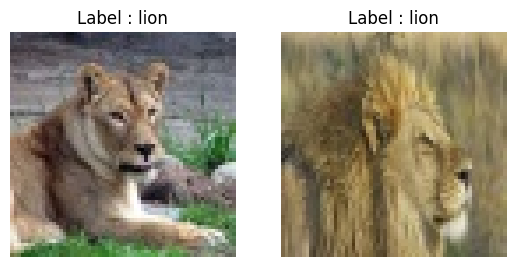

In [16]:
view_random_images("/content/animals/animals/train","lion")

horse519.jpg
horse1107.jpg


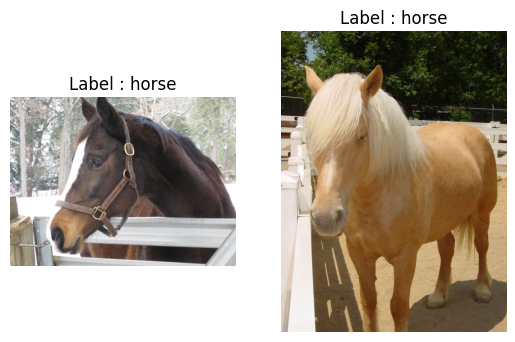

In [17]:
view_random_images("/content/animals/animals/train","horse")

In [18]:
dict_class = count_images_in_classes("/content/animals/animals/train")

In [19]:
dict_class

{'dog': 2627, 'cat': 2737, 'lion': 2675, 'horse': 2705, 'elephant': 2730}

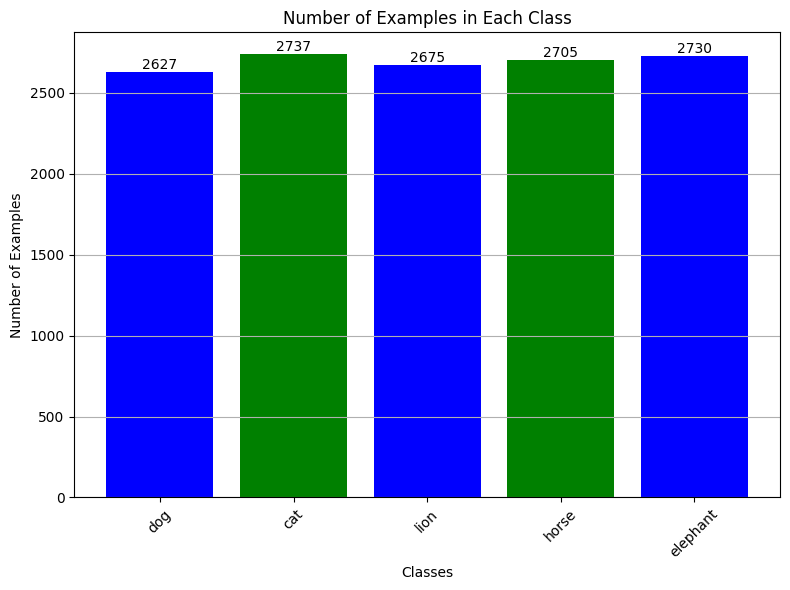

In [20]:
# Get class names and corresponding counts
class_names = list(dict_class.keys())
counts = list(dict_class.values())

# Create the histogram
plt.figure(figsize=(8, 6))
bars = plt.bar(class_names, counts, color=['blue', 'green'])  # Change colors as needed

# Add text labels above each bar
for bar, count in zip(bars, counts):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), count, ha='center', va='bottom')

# Customize plot
plt.xlabel('Classes')
plt.ylabel('Number of Examples')
plt.title('Number of Examples in Each Class')
plt.xticks(rotation=45)
plt.grid(axis='y')

# Show plot
plt.tight_layout()
plt.show()

## 3.Importing the data

In [21]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_dir ="/content/animals/animals/train"
valid_dir ="/content/animals/animals/val"

train_datagen = ImageDataGenerator(rescale=1/255.,rotation_range=0.2,width_shift_range=0.2,height_shift_range=0.2,shear_range=0.2,zoom_range=0.2,horizontal_flip=True)
valid_datagen = ImageDataGenerator(rescale=1/255.)

train_data = train_datagen.flow_from_directory(train_dir,target_size=(150,150),color_mode="rgb",class_mode="categorical",batch_size=32,shuffle=True)

valid_data = valid_datagen.flow_from_directory(valid_dir,target_size=(150,150),color_mode="rgb",class_mode="categorical",batch_size=32,shuffle=True)



Found 13474 images belonging to 5 classes.
Found 1497 images belonging to 5 classes.


In [22]:
train_data.next()

(array([[[[0.30588236, 0.28235295, 0.2901961 ],
          [0.30588236, 0.28235295, 0.2901961 ],
          [0.30588236, 0.28235295, 0.2901961 ],
          ...,
          [0.38072306, 0.32493737, 0.31924838],
          [0.46274513, 0.4039216 , 0.3921569 ],
          [0.46274513, 0.4039216 , 0.3921569 ]],
 
         [[0.30588236, 0.28235295, 0.2901961 ],
          [0.30588236, 0.28235295, 0.2901961 ],
          [0.30588236, 0.28235295, 0.2901961 ],
          ...,
          [0.38082165, 0.3250323 , 0.31933603],
          [0.46274513, 0.4039216 , 0.3921569 ],
          [0.46274513, 0.4039216 , 0.3921569 ]],
 
         [[0.2987549 , 0.27700734, 0.28841424],
          [0.29879063, 0.27703416, 0.28842318],
          [0.29882637, 0.27706096, 0.2884321 ],
          ...,
          [0.39460385, 0.33891723, 0.3324901 ],
          [0.46090832, 0.402544  , 0.3907793 ],
          [0.4609441 , 0.4025708 , 0.3908061 ]],
 
         ...,
 
         [[0.7555066 , 0.708576  , 0.64557433],
          [0.75532

## 4.Creating model

In [23]:
from tensorflow.keras.layers import Conv2D,Dense,Input,Flatten,MaxPool2D
from tensorflow.keras.optimizers import Adam

from tensorflow.keras.models import Sequential

In [24]:
model_1 = Sequential([
    Conv2D(32,(3,3),activation="relu",padding="same",input_shape=(150,150,3)),
    MaxPool2D(),
    Conv2D(64,(3,3),activation="relu",padding="same"),
    MaxPool2D(),
    Conv2D(128,(3,3),activation="relu",padding="same"),
    MaxPool2D(),
    Flatten(),
    Dense(5,activation="softmax")

])

In [25]:
model_1.compile(loss="categorical_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy",tf.keras.metrics.Precision(name='precision'),tf.keras.metrics.Recall(name='recall')])

In [26]:
hist_1 = model_1.fit(train_data,epochs=10,steps_per_epoch=len(train_data),
                     validation_data = valid_data,validation_steps=len(valid_data))

Epoch 1/10
422/422 [==============================] - 137s 311ms/step - loss: 1.3204 - accuracy: 0.4547 - precision: 0.6496 - recall: 0.1829 - val_loss: 0.7907 - val_accuracy: 0.7021 - val_precision: 0.7950 - val_recall: 0.5778
Epoch 2/10
422/422 [==============================] - 126s 298ms/step - loss: 0.9355 - accuracy: 0.6447 - precision: 0.7393 - recall: 0.5062 - val_loss: 0.7320 - val_accuracy: 0.7321 - val_precision: 0.7940 - val_recall: 0.6386
Epoch 3/10
422/422 [==============================] - 129s 305ms/step - loss: 0.7589 - accuracy: 0.7134 - precision: 0.7838 - recall: 0.6196 - val_loss: 0.4786 - val_accuracy: 0.8290 - val_precision: 0.8681 - val_recall: 0.7822
Epoch 4/10
422/422 [==============================] - 128s 302ms/step - loss: 0.6606 - accuracy: 0.7468 - precision: 0.8045 - recall: 0.6779 - val_loss: 0.4234 - val_accuracy: 0.8430 - val_precision: 0.8718 - val_recall: 0.8043
Epoch 5/10
422/422 [==============================] - 127s 300ms/step - loss: 0.5985 - a

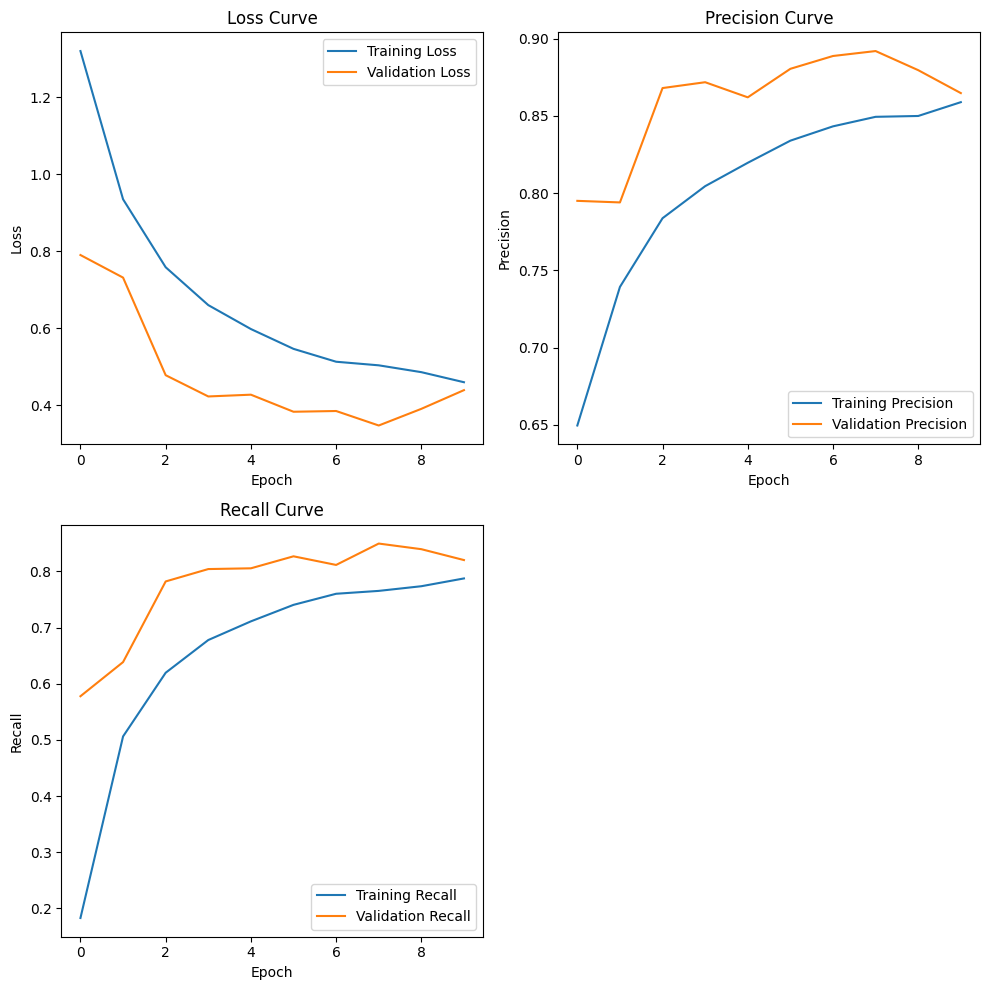

In [27]:
plot_metric_curves(hist_1)

In [28]:
m_1 = model_1.evaluate(valid_data)

47/47 [==============================] - 4s 79ms/step - loss: 0.4398 - accuracy: 0.8457 - precision: 0.8648 - recall: 0.8203


## 5.Experimentation

In [29]:
# Add extra conv layers
model_2 = Sequential([
    Conv2D(32,(3,3),activation="relu",padding="same",input_shape=(150,150,3)),
    Conv2D(32,(3,3),activation="relu",padding="same"),
    MaxPool2D(),
    Conv2D(64,(3,3),activation="relu",padding="same"),
    Conv2D(64,(3,3),activation="relu",padding="same"),
    MaxPool2D(),
    Conv2D(128,(3,3),activation="relu",padding="same"),
    Conv2D(128,(3,3),activation="relu",padding="same"),
    MaxPool2D(),
    Flatten(),
    Dense(5,activation="softmax")

])


In [30]:
model_2.compile(loss="categorical_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy",tf.keras.metrics.Precision(name='precision'),tf.keras.metrics.Recall(name='recall')])

In [31]:
hist_2 = model_2.fit(train_data,epochs=10,steps_per_epoch=len(train_data),
                     validation_data = valid_data,validation_steps=len(valid_data))

Epoch 1/10
422/422 [==============================] - 138s 313ms/step - loss: 1.4688 - accuracy: 0.3527 - precision: 0.5604 - recall: 0.0655 - val_loss: 1.1683 - val_accuracy: 0.5311 - val_precision: 0.6281 - val_recall: 0.3226
Epoch 2/10
422/422 [==============================] - 135s 319ms/step - loss: 1.0773 - accuracy: 0.5683 - precision: 0.6751 - recall: 0.3841 - val_loss: 0.6459 - val_accuracy: 0.7361 - val_precision: 0.7767 - val_recall: 0.6947
Epoch 3/10
422/422 [==============================] - 135s 320ms/step - loss: 0.8204 - accuracy: 0.6710 - precision: 0.7409 - recall: 0.5704 - val_loss: 0.5169 - val_accuracy: 0.7882 - val_precision: 0.8111 - val_recall: 0.7542
Epoch 4/10
422/422 [==============================] - 135s 321ms/step - loss: 0.6995 - accuracy: 0.7220 - precision: 0.7786 - recall: 0.6504 - val_loss: 0.6200 - val_accuracy: 0.7849 - val_precision: 0.8152 - val_recall: 0.7041
Epoch 5/10
422/422 [==============================] - 137s 324ms/step - loss: 0.6172 - a

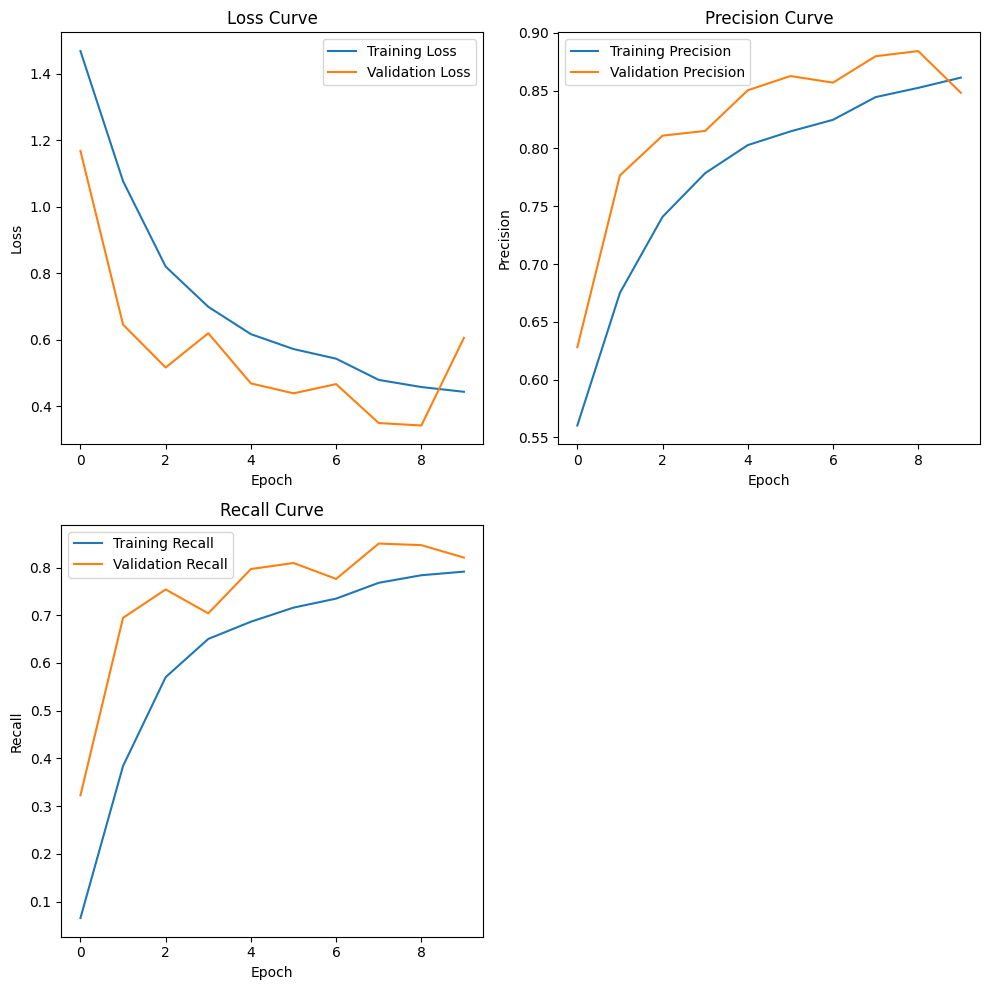

In [32]:
plot_metric_curves(hist_2)

In [33]:
m_2 = model_2.evaluate(valid_data)

47/47 [==============================] - 5s 102ms/step - loss: 0.6062 - accuracy: 0.8323 - precision: 0.8482 - recall: 0.8210


In [43]:
metric_dict = {"m1":m_1,"m2":m_2}
metric_df = pd.DataFrame(metric_dict,index=["loss","accuracy","precision","recall"])


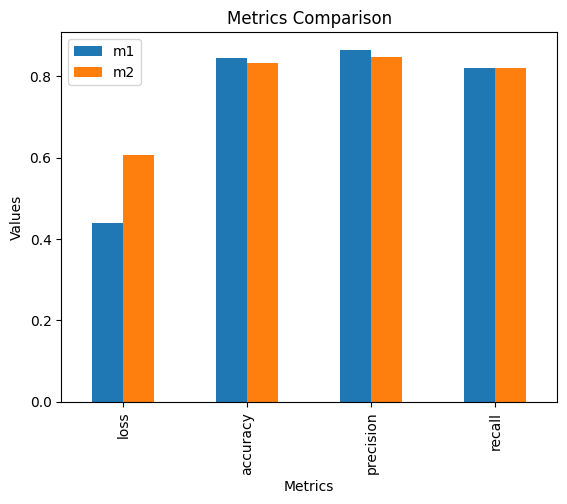

In [44]:
# Plotting the bar graph
metric_df.plot(kind='bar')
plt.title('Metrics Comparison')
plt.xlabel('Metrics')
plt.ylabel('Values')
plt.show()

Model_1 is overall better model

## 6.Making Predictions

In [56]:
model_1.save("model_1.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [53]:
def load_and_prep_image(filename,img_shape=150):
  """
  Reads an image from filename,turns it into a tensor and reshapes it to
  (img_shape,img_shape,colour_channels)
  """
  # Read in the image
  img = tf.io.read_file(filename)
  # Decode the read file into a tensor
  img = tf.image.decode_image(img)
  #  Resize the image
  img = tf.image.resize(img,[img_shape,img_shape])
  # Rescale the image
  img = img/255.
  img = tf.expand_dims(img,axis=0)
  return img
def pred_and_plot(model,filename,class_names=class_names):
  """
  Import an image located at filename,makes a prediction with model
  and plots the image with the predicted class as the title
  """
  # Import the image
  img = load_and_prep_image(filename)

  # Make a prediction
  pred_prob = model.predict(img)
  # Get the class name
  pred_class = class_names[int(tf.round(pred_prob))]
  # Plot the image
  plt.imshow(tf.squeeze(img))
  plt.title(f"Predicted_Label:{pred_class}")
  plt.axis(False)


In [47]:
# cat image
from google.colab import files
for i in range(4):
  uploaded = files.upload()
# dog
for i in range(4):
  uploaded = files.upload()
# elephant
for i in range(4):
  uploaded = files.upload()
# lion
for i in range(4):
  uploaded = files.upload()
# Horse
for i in range(4):
  uploaded = files.upload()



Saving image.jpg to image.jpg


Saving kitten.jpg to kitten.jpg


Saving OIP.jpg to OIP.jpg


Saving wildcat.jpg to wildcat.jpg


Saving labrador.jpg to labrador.jpg


Saving dachshund.jpg to dachshund.jpg


Saving germansheperd.jpg to germansheperd.jpg


Saving indiandog.jpg to indiandog.jpg


Saving lion1.jpg to lion1.jpg


Saving lion2.jpg to lion2.jpg


Saving lion3.jpg to lion3.jpg


Saving lion4.jpg to lion4.jpg


Saving elephant1.jpg to elephant1.jpg


Saving elephant3.jpg to elephant3.jpg


Saving elephant4.jpg to elephant4.jpg


Saving elephantnew.jpg to elephantnew.jpg


Saving horse1.jpg to horse1.jpg


Saving horse2.jpg to horse2.jpg


Saving horse3.jpg to horse3.jpg


Saving horse4.jpg to horse4.jpg


In [54]:
def plot_4(arr,class_name):
  plt.figure(figsize=(20,20))
  plt.subplot(1,4,1)
  pred_and_plot_image(model_6,arr[0],class_name)
  plt.subplot(1,4,2)
  pred_and_plot_image(model_6,arr[1],class_name)
  plt.subplot(1,4,3)
  pred_and_plot_image(model_6,arr[2],class_name)
  plt.subplot(1,4,4)
  pred_and_plot_image(model_6,arr[3],class_name)


NameError: name 'pred_and_plot_image' is not defined

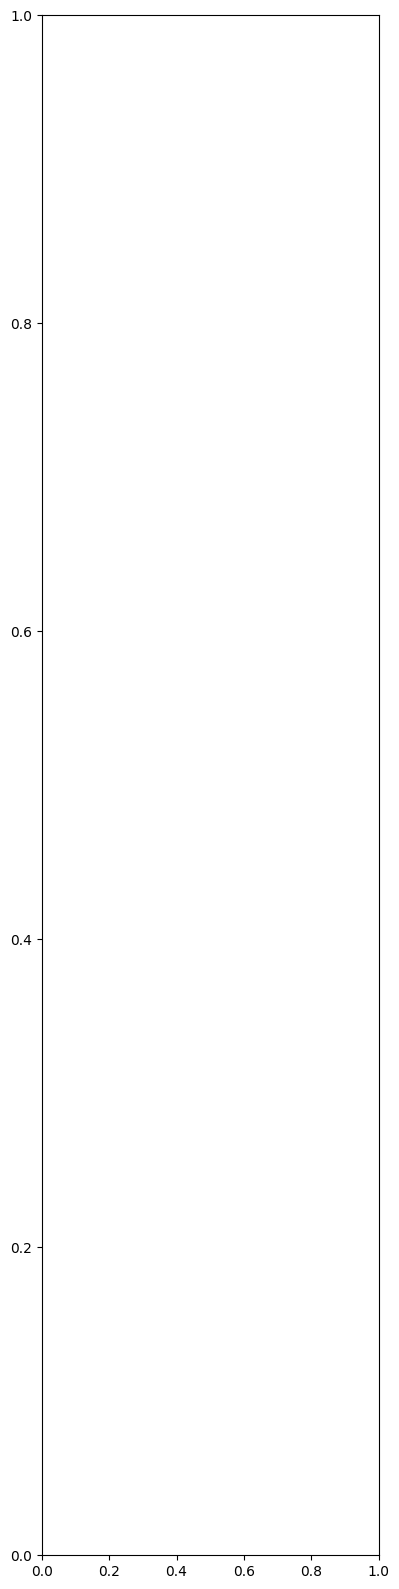

In [55]:
plot_4(["lion1jpg","lion2.jpg","lion3.jpg","lion4.jpg"],"lion")


In [ ]:
# Plotting the predictions of cat
plt.figure(figsize=(20,20))
plt.subplot(1,4,1)
pred_and_plot_image(model_6,"wildcat.jpg","cat")
plt.subplot(1,4,2)
pred_and_plot_image(model_6,"OIP.jpg","cat")
plt.subplot(1,4,3)
pred_and_plot_image(model_6,"kitten.jpg","cat")
plt.subplot(1,4,4)
pred_and_plot_image(model_6,"image.jpg","cat")


In [ ]:
# Plotting the predictions of cat
plt.figure(figsize=(20,20))
plt.subplot(1,4,1)
pred_and_plot_image(model_6,"wildcat.jpg","cat")
plt.subplot(1,4,2)
pred_and_plot_image(model_6,"OIP.jpg","cat")
plt.subplot(1,4,3)
pred_and_plot_image(model_6,"kitten.jpg","cat")
plt.subplot(1,4,4)
pred_and_plot_image(model_6,"image.jpg","cat")


In [ ]:
# Plotting the predictions of cat
plt.figure(figsize=(20,20))
plt.subplot(1,4,1)
pred_and_plot_image(model_6,"wildcat.jpg","cat")
plt.subplot(1,4,2)
pred_and_plot_image(model_6,"OIP.jpg","cat")
plt.subplot(1,4,3)
pred_and_plot_image(model_6,"kitten.jpg","cat")
plt.subplot(1,4,4)
pred_and_plot_image(model_6,"image.jpg","cat")
